In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np
from random import choice, random
import time

# 1. Generation of graphs

###  Use library scripts to generate *p*-ER random graphs and *r*-regular random graph
Let:
* K = number of nodes
* r = degree of each node in the *r*-regular random graph
* p = probability of an arc to be in the graph, i.e. a random number in (0,1)

If we want to impose that both types of graph have the same number of edges, then we choose:
* $p = \frac{r}{K-1}$

In [12]:
def regularRandomGraph(r,K):
    return nx.random_regular_graph(r,K)

def erdosRenyiRandomGraph(K,p):  # p = random()
    return nx.erdos_renyi_graph(K, p)

C:\Users\Clara\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


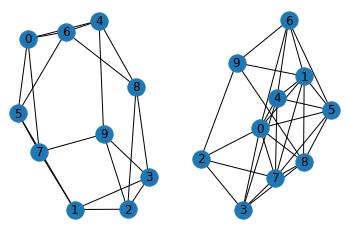

In [3]:
K = 10  # number of nodes
r = 4   # degree of each node

RG = nx.random_regular_graph(r,K)  # example of 4-regular random graph with 10 nodes
ER = nx.erdos_renyi_graph(K, random())   # example of p-ER random graph, with probability p randamly generated and 10 nodes

plt.subplot(121)
nx.draw(RG, with_labels=True) 

plt.subplot(122)
nx.draw(ER, with_labels=True)

plt.show()

# 2. Connectivity

## 2.1 Irreducibility

In [4]:
def connectivityByIrreducibility(G):   # G graph
    A = nx.adjacency_matrix(G).todense()
    n = len(A)
    I = A**0
    for i in range(1,n):
        I += A**i
    if (I > 0).all():
        return True
    return False

In [5]:
print(connectivityByIrreducibility(RG), connectivityByIrreducibility(ER))

True True


## 2.2 Eigenvalues

In [6]:
def connectivityByEigenvalue(G):
    L = nx.laplacian_matrix(G)
    eigenvalues = np.linalg.eig(L.todense())[0]
    sortedEigenvalues = np.sort(eigenvalues)
    return (sortedEigenvalues[1] > 0)   

In [7]:
print(connectivityByEigenvalue(RG), connectivityByEigenvalue(RG))

True True


## 2.3 Breadth first search 

In [8]:
def connectivityByBfs(G):
    root = choice(list(G))  # select a random node from G as the source of the path
    edges = nx.bfs_edges(G, root)
    nodes = [root] + [v for u, v in edges]
    notVisited = list(set(G) - set(nodes))
    return len(notVisited) == 0

In [9]:
print(connectivityByBfs(RG), connectivityByBfs(ER))

True True


# 3. Complexity

### Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.

In [144]:
def randomRegularGraphComplexity(r):
    complexityMethod1, complexityMethod2, complexityMethod3 = [], [], []
   
    for K in range(71,91):   # K is the number of nodes in the graph
        timeMethod1, timeMethod2, timeMethod3 = [], [], []
        
        for J in range(100):  # for fixed number of nodes, check connectivity many times
            if K > r:
                G = regularRandomGraph(r,K)
                
                start1 = time.perf_counter()
                connectivityByIrreducibility(G)
                end1 = time.perf_counter()
                timeMethod1.append(end1-start1)
                
                start2 = time.perf_counter()
                connectivityByEigenvalue(G)
                end2 = time.perf_counter()
                timeMethod2.append(end2-start2)
                
                start3 = time.perf_counter()
                connectivityByBfs(G)
                end3 = time.perf_counter()
                timeMethod3.append(end3-start3)
                
        complexityMethod1.append(sum(timeMethod1)/1000)
        complexityMethod2.append(sum(timeMethod2)/1000)
        complexityMethod3.append(sum(timeMethod3)/1000)
        
    return complexityMethod1, complexityMethod2, complexityMethod3

In [145]:
# I used this block just to concatenate the results of many executions of the function randomRegularGraphComplexity(r).. 
# hopefully your pc is faster and you don't need it
complexityMethod12, complexityMethod22, complexityMethod32 = randomRegularGraphComplexity(4)

In [177]:
# As the block above
complexityMethod1 = complexityMethod1[:70] + complexityMethod12 
complexityMethod2 = complexityMethod2[:70] + complexityMethod22 
complexityMethod3 = complexityMethod3[:70] + complexityMethod32

In [ ]:
# complexityMethod1, complexityMethod2, complexityMethod3 = randomRegularGraphComplexity(4)

The following plot shows the growth of the time complexity of the three methods used to check the connecivity of 4-regular random graphs against the number of nodes $K$ of the graph, for $K\in[1,90]$. 

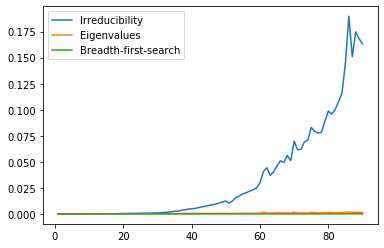

In [181]:
plt.plot(range(1,91), complexityMethod1, label = 'Irreducibility')
plt.plot(range(1,91), complexityMethod2, label = 'Eigenvalues')
plt.plot(range(1,91), complexityMethod3, label = 'Breadth-first-search')
plt.legend()

The first method, i.e. check connectivity by the irreducibility of the adjacency metrix, results to have a much higher time coplexity compared to other two, therefore we plot only the curves of complexity of the methods of eigenvalues and bfs to get a more precise result:

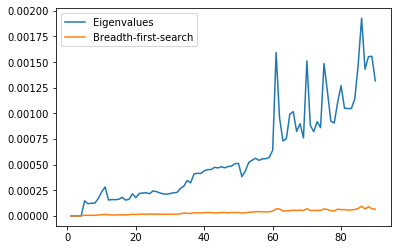

In [182]:
plt.plot(range(1,91), complexityMethod2, label = 'Eigenvalues')
plt.plot(range(1,91), complexityMethod3, label = 'Breadth-first-search')
plt.legend()

**For 4-regular random graphs, the method to check connectivity having the lowest time complexity is the Breadth-first-search algorithm**

In [19]:
def erdosRenyiRandomGraphComplexity():
    complexityMethod1, complexityMethod2, complexityMethod3 = [], [], []
    
    for K in range(2,101):   # K is the nomber of nodes in the graph
        timeMethod1, timeMethod2, timeMethod3 = [], [], []
        
        for J in range(100):  # for fixed number of nodes, check connectivity many times
            G = erdosRenyiRandomGraph(K,random())
            
            start1 = time.perf_counter()
            connectivityByIrreducibility(G)
            end1 = time.perf_counter()
            timeMethod1.append(end1-start1)
            
            start2 = time.perf_counter()
            connectivityByEigenvalue(G)
            end2 = time.perf_counter()
            timeMethod2.append(end2-start2)
            
            start3 = time.perf_counter()
            connectivityByBfs(G)
            end3 = time.perf_counter()
            timeMethod3.append(end3-start3)
        
        complexityMethod1.append(sum(timeMethod1)/1000)
        complexityMethod2.append(sum(timeMethod2)/1000)
        complexityMethod3.append(sum(timeMethod3)/1000)
    
    return complexityMethod1, complexityMethod2, complexityMethod3

In [20]:
complexityMethodER1, complexityMethodER2, complexityMethodER3 = erdosRenyiRandomGraphComplexity()

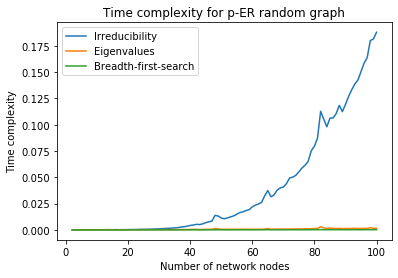

In [24]:
plt.title('Time complexity for p-ER random graph')
plt.xlabel('Number of network nodes')
plt.ylabel('Time complexity')
plt.plot(range(2,101), complexityMethodER1, label = 'Irreducibility')
plt.plot(range(2,101), complexityMethodER2, label = 'Eigenvalues')
plt.plot(range(2,101), complexityMethodER3, label = 'Breadth-first-search')
plt.legend()

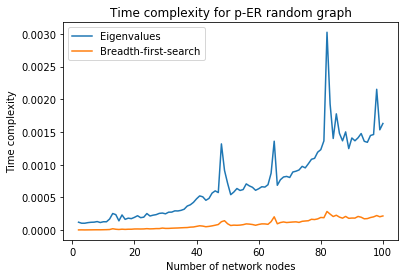

In [25]:
plt.title('Time complexity for p-ER random graph')
plt.xlabel('Number of network nodes')
plt.ylabel('Time complexity')
plt.plot(range(2,101), complexityMethodER2, label = 'Eigenvalues')
plt.plot(range(2,101), complexityMethodER3, label = 'Breadth-first-search')
plt.legend()

**Just like in the case of $r$-regular random graphs, the faster algorithm to compute the connectivity of a $p$-ER random graph is the Breadth-first-search algorithm**

# 4. Probability of connectedness

### Let $p_c(\mathcal(G))$ denote the probability that a graph G is connected. Estimate $p_c(\mathcal(G))$ 

* Erdos-Rényi random graphs

    Set $K = 100$ and evaluate $p_c(\mathcal(G))$ as a function of the probability $p$:

In [26]:
def probConnectivityErdosRenyiGraph(probVector):
    pc = [0]*len(probVector)
    K = 100
    for j in range(len(probVector)):
        p = probVector[j]
        counter = 0
        for i in range(1000):
            G = erdosRenyiRandomGraph(K,p)
            if connectivityByBfs(G) == True:
                counter += 1
        pc[j] = counter / 1000
    return pc

In [27]:
probVector = np.linspace(0, 1, num=50, endpoint=False)
pc = probConnectivityErdosRenyiGraph(probVector)

Plot of $p_c(\mathcal(G))$ against the probability $p$, for $p\in(0,1)$

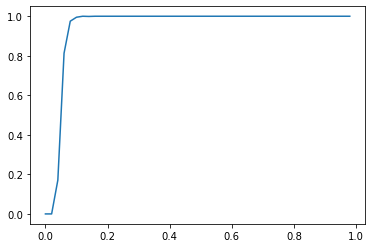

In [28]:
plt.plot(probVector, pc)

A theoretical result by Erdős and Rényi (*P. Erdős, A. Rényi (1960) "On the evolution of random graphs"*) states that a sharp threshold for the connectivity of a $p$-ER grapg $G(K,p)$ is given by $\frac{\ln(K)}{K}$, i.e. $G(K,p)$ is almost surely connected for any $p > \frac{(1+\varepsilon)\ln(K)}{K}$. In our specific case $K = 100$, therefore we expect the graph to be connected for any $p > \frac{\ln(K)}{K} = \frac{\ln(100)}{100} \approx 0.046$.

TypeError: axvline() takes from 0 to 3 positional arguments but 4 were given

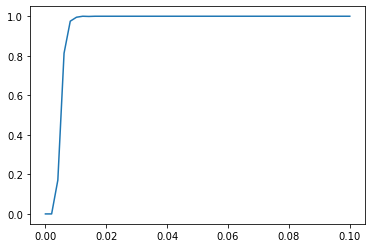

In [31]:
probVectorSmall = np.linspace(0.0, 0.1, num=50)
pcSmall = probConnectivityErdosRenyiGraph(probVector)


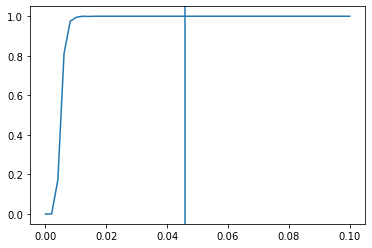

In [33]:
plt.plot(probVector, pc)
plt.axvline(0.046, 0, 1)

* $r$-regular random graphs

    For $r = 2$ and $r=8$, evaluate $p_c(\mathcal(G))$ as a function of the number of nodes $K$, with $K\leqslant 100$ :

In [38]:
def probConnectivityRegularRandomGraph(r):
    pc = [0]*100
    for K in range(1,101):
        counter = 0
        if K > r:
            for i in range(1000):
                G = regularRandomGraph(r,K)
                if connectivityByBfs(G) == True:
                    counter += 1
            pc[K-1] = counter / 1000        
    return pc

In [39]:
pcRegular = probConnectivityRegularRandomGraph(8)

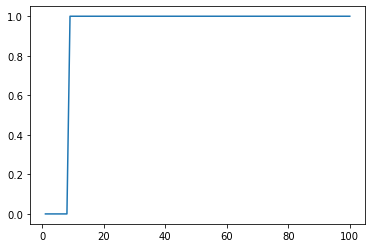

In [49]:
plt.plot(range(1,101), pcRegular)

In [44]:
pcRegular2 = probConnectivityRegularRandomGraph(2)

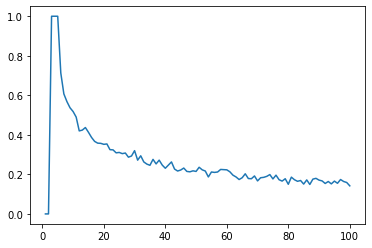

In [46]:
plt.plot(range(1,101), pcRegular2)

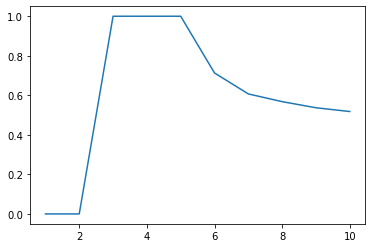

In [47]:
plt.plot(range(1,11), pcRegular2[:10])

In [ ]:
for r in [2,8]:
    pc = probConnectivityRegularRandomGraph(r)
    plt.plot(range(1,101), pc)